In [188]:
import tensorflow as tf

In [189]:
from sklearn.datasets import make_circles
# Make 1000 examples
n_samples = 1000
# Create circles
x, y = make_circles(n_samples, noise=0.03, random_state=42)

In [190]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [191]:
x[:,0]

array([ 7.54246251e-01, -7.56158882e-01, -8.15391934e-01, -3.93730729e-01,
        4.42207645e-01, -4.79646368e-01, -1.36483595e-02,  7.71513274e-01,
       -1.69322340e-01, -1.21485796e-01, -6.42490416e-01,  5.69466604e-01,
       -1.17735911e-01,  7.34100038e-01,  6.00776333e-01,  1.90225707e-01,
       -9.36951846e-01,  1.07061696e-01, -8.18913619e-01, -6.42100130e-01,
        6.26827199e-01, -5.62291360e-01, -2.12666579e-02,  7.39770578e-01,
       -9.09048393e-01, -9.36994111e-01,  2.86615780e-01,  8.26260717e-01,
        2.53433397e-01,  6.57946255e-01, -3.14834779e-01, -2.23989601e-01,
        8.44389246e-03,  1.00503887e+00, -8.95158198e-02, -7.88574473e-01,
       -5.68205362e-01,  4.47646782e-01,  2.63260719e-01,  7.45020435e-01,
       -5.97118971e-01,  3.61928379e-01, -7.14242507e-01,  8.33839377e-01,
       -8.33981856e-01, -9.10860642e-01,  4.87625557e-01,  2.30736878e-01,
        7.58412791e-01, -4.12746839e-01,  4.76176622e-01,  3.99958509e-02,
       -9.66328252e-01,  

In [192]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [193]:
import pandas as pd
df = pd.DataFrame({"X0" : x[:,0],
                   "X1" : x[:,1],
                   "label" : y
                  })

In [194]:
df.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [195]:
df["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

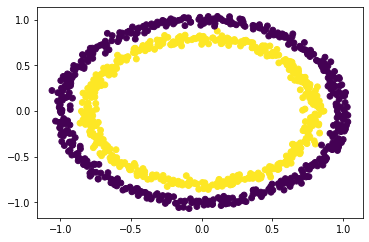

In [196]:
import matplotlib.pyplot as plt
plt.figure(dpi=70)
plt.scatter(x[:,0] , x[:,1] , c=y)

In [197]:
x.shape , y.shape

((1000, 2), (1000,))

In [198]:
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [199]:
model_1.add(tf.keras.Input(shape=(2,)))
model_1 = tf.keras.Sequential([
          tf.keras.layers.Dense(1)
])

In [200]:
model_1.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

In [201]:
model_1.fit(x,y,epochs=100 , verbose=0)

In [202]:
model_1.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932058930397034, 0.5]

In [203]:
# model_2.add(tf.keras.Input(shape=(1,)))
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100 , activation='relu'),
    tf.keras.layers.Dense(10 , activation='relu'),
    tf.keras.layers.Dense(1 , activation='sigmoid')
])

In [204]:
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [205]:
model_2.fit(x,y,epochs=100,verbose=0)

In [206]:
model_2.evaluate(x,y)

32/32 [==============================] - 0s 737us/step - loss: 0.0043 - accuracy: 1.0000


[0.004310568794608116, 1.0]

In [207]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 501us/step
doing binary classifcation...


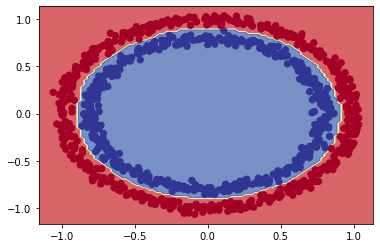

In [208]:
plot_decision_boundary(model_2, x, y)

In [209]:
from sklearn.model_selection import train_test_split

In [210]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [211]:
# x_train.shape , x_test.shape

In [224]:
x.

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [226]:
x_train, y_train = x[:800], y[:800] # 80% of the data for the training set
x_test, y_test = x[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
x_train.shape, x_test.shape

((800, 2), (200, 2))

In [227]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [228]:
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [230]:
model_3.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100)

Epoch 1/100


TypeError: 'NoneType' object is not callable